In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
import tweepy
import json
import re
import warnings

# Gathering_Data

In [3]:
# Reading the given csv file and saving as a Pandas DataFrame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Requests library in downloading  image_predictions file tsv file from the given url
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image_file = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(image_file.content)


In [4]:
# image predictions tsv file as DataFrame    
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')  

In [6]:
# Personal API keys, secrets, and tokens have been inserted as received from twitter
consumer_key = 'My consumer_key from developer.twitter.com'
consumer_secret = 'My consumer_secret from developer.twitter.com'
access_token = 'My access_token from developer.twitter.com'
access_secret = 'My access_secret from developer.twitter.com'

# Tweepy query and creation of variables
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
# Storing data using API, For loop will be adding each available tweet to a new line of tweet_json.txt

with open('tweet_json.txt', 'a', encoding='utf8') as file:
    # t = time.process_time()
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue
    # elapsed_time = time.process_time()-t
    # print(elapsed_time)

In [6]:
# appending each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [7]:
# Creation of df_tweet_info DataFrame
df_tweet_info = pd.DataFrame()

# Variables addition to df_tweet_info DataFrame
df_tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))

df_tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
df_tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
df_tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8479,38493
1,892177421306343426,6241,32987
2,891815181378084864,4136,24839
3,891689557279858688,8597,41865
4,891327558926688256,9336,40028


# Assessing_Data

In [8]:
# Viewing first 2 rows of df_archive DataFrame
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [9]:
# Viewing info of df_archive DataFrame
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Viewing description of df_archive DataFrame
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Similarly Viewing first 5 rows of image_predictions DataFrame
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
# Similarly Viewing first 5 rows of df_tweet_info DataFrame
df_tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8479,38493
1,892177421306343426,6241,32987
2,891815181378084864,4136,24839
3,891689557279858688,8597,41865
4,891327558926688256,9336,40028


In [15]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 3 columns):
id                2415 non-null int64
retweet_count     2415 non-null int64
favorite_count    2415 non-null int64
dtypes: int64(3)
memory usage: 56.7 KB


In [16]:
df_tweet_info.describe()

,id,retweet_count,favorite_count
count,2.415000e+03,2415.000000,2415.000000
mean,7.465815e+17,3093.144928,8666.007453
std,7.164027e+16,5073.617500,13057.648591
min,6.660209e+17,0.000000,0.000000
25%,6.789805e+17,610.500000,1439.500000
50%,7.268871e+17,1466.000000,3642.000000
75%,8.065593e+17,3642.000000,10924.500000
max,8.924206e+17,84150.000000,162120.000000


In [17]:
# Viewing source entries to present it in organised & simple way at later stage
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
# Few places dog name is fetched as 'O' but we can see in the 'text' column that the dog's name is actually 'O'Malley' 
df_archive[df_archive.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [19]:
# Viewing df_archive containing '&amp;' instead of '&' in 'text' column for rectification at later stages
df_archive[df_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


# Data_Cleaning

Quality Issues: 

1)	Few variable columns such as 'in_reply_to_status_id','in_reply_to_user_id' , etc. have many missing values.  
2)	Rows and columns (such as 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' related  to  retweets () needed  to be deleted.  
3)	 Missing values in names changed from ‘none’ to ‘NaN’ as part of the protocol.  
4)	Datatypes of numerator and denominator to be rectified.  
5)	Rating numerator is not handled properly.  
6)	Extra characters after '&' i.e, ‘&amp’  
7)	Sources are illegible and unorganized  
8)	Erroneous Datatypes (timestamp,  tweet_id)  
9)	Tweet ID# 810984652412424192 doesn't contain a rating  
10)	Erroneous names extracted from texts.  


Tidiness Issues: 

1) Dog stage variables presented in four columns(doggo, floofer, pupper, puppo) may be properly organized and presented in one column.  
2) 3 data frames viz. df_archive_forcleaning, df_image_predictions_forcleaning and df_tweet_info_forcleaning can be merged and redundant columns can be dropped.

#### Define

create copies of original DataFrames before cleaning

#### Code

In [20]:
# First of all create copies of original DataFrames to work with
df_archive_forcleaning = df_archive.copy()
df_image_predictions_forcleaning = df_image_predictions.copy()
df_tweet_info_forcleaning = df_tweet_info.copy()

#### Define

Quality Issue Point: 1   
Columns with many null values to be dropped

#### Code

In [21]:
# Columns with most values blank are being dropped (Quality Issues list number-4)
columns = ['in_reply_to_status_id','in_reply_to_user_id']
df_archive_forcleaning = df_archive_forcleaning.drop(columns, axis=1)

##### Test

In [22]:
df_archive_forcleaning.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Define

Quality Issue Point 2  
Rows related to retweet being deleted

#### Code

In [23]:
df_archive_forcleaning = df_archive_forcleaning[df_archive_forcleaning['retweeted_status_id'].isnull()]

#### Test

In [24]:
df_archive_forcleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 271.9+ KB


#### Define

Quality Issue Point 2  
Columns related to retweet being deleted

#### Code

In [25]:
# drop columns related to retweets 
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_forcleaning = df_archive_forcleaning.drop(columns, axis=1)

#### Test

In [26]:
df_archive_forcleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define

Tidiness issues Point 1  
Creation of dog stage inplace of four different entries 

#### Code

In [27]:
# For dropping four more columns, Creation of 'dog_stage' from the text column when available (Tidiness Issues list number-1)
df_archive_forcleaning['dog_stage'] = df_archive_forcleaning['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [28]:
# Dropping of four more columns 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
#twitter_archive_clean.drop(columns, axis=1)

df_archive_forcleaning = df_archive_forcleaning.drop(columns, axis=1)

#### Test

In [29]:
df_archive_forcleaning.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


#### Define

Tidiness Issue Point 2:
Merging the 3 dataframes into one. And deletion of redundant column "id"

#### Code

In [30]:
# merging of 2 dataframes (df_archive_forcleaning , df_tweet_info_forcleaning,using tweet_id of one and id of other (Tidiness Issues list number-2)

df_archive_forcleaning = pd.merge(left=df_archive_forcleaning, right=df_tweet_info_forcleaning, left_on='tweet_id', right_on='id', how='inner')

In [31]:
# merging of 2 dataframes (df_archive_forcleaning , df_image_predictions_forcleaning,using tweet_id of both 

df_archive_forcleaning = df_archive_forcleaning.merge(df_image_predictions_forcleaning, on='tweet_id', how='inner')

In [32]:
# dropping of redundant "ID" variable column due to merger originally present in tweet_info_clean dataframe

df_archive_forcleaning = df_archive_forcleaning.drop('id', axis=1)

#### Test

In [ ]:
df_archive_forcleaning.info()

#### Define

Quality Issue Point 3:  
The names 'none' is replaced by 'NaN'

#### Code

In [34]:
# missing values in 'name' is changed from 'None' to NaN 
df_archive_forcleaning['name'] = df_archive_forcleaning['name'].replace('None', np.NaN)

#### Test

In [35]:
df_archive_forcleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 22 columns):
tweet_id              2056 non-null int64
timestamp             2056 non-null object
source                2056 non-null object
text                  2056 non-null object
expanded_urls         2056 non-null object
rating_numerator      2056 non-null int64
rating_denominator    2056 non-null int64
name                  1500 non-null object
dog_stage             335 non-null object
retweet_count         2056 non-null int64
favorite_count        2056 non-null int64
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 non-null float6

In [36]:
# warnings handled
warnings.simplefilter('ignore')

#### Define

Quality issues Point 4  
Datatypes of rating numerator and denominator is being taken up

#### Code

In [37]:
# Change datatype of rating_numerator and denominator to float (Quality Issues list number-3)
df_archive_forcleaning['rating_numerator'] = df_archive_forcleaning['rating_numerator'].astype('float')
df_archive_forcleaning['rating_denominator'] = df_archive_forcleaning['rating_denominator'].astype('float')

#### Define
Quality Issue Point 5
Decimal case of rating numerator is not handled properly

#### Code

In [38]:
df_archive_forcleaning[df_archive_forcleaning.text.str.contains(r"((?:\d+\.)?\d+)\/(\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8479,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8479,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6241,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
3,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6239,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
4,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4136,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
5,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4137,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
6,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8597,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
7,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8598,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
8,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9336,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
9,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9335,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define

Quality issues Point 6:
Issue of '&amp' is resolved by replacing it with '&'

#### Code

In [39]:
# Replacing &amp with & in text variable column (Quality Issues list number-5)
df_archive_forcleaning['text'] = df_archive_forcleaning['text'].str.replace('&amp;', '&')

#### Test

In [40]:
df_archive_forcleaning.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8479,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8479,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6241,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
3,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6239,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
4,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4136,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
5,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4137,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
6,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8597,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
7,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8598,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
8,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9336,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
9,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9335,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define

Quality issues Point 7:  
Illegible and confusing source url is taken up

#### Code

In [41]:
# Remove url from sources & Change sources to more readable categories (Quality Issues list number-6)
df_archive_forcleaning['source'] = df_archive_forcleaning['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter via iPhone')
df_archive_forcleaning['source'] = df_archive_forcleaning['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_archive_forcleaning['source'] = df_archive_forcleaning['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_archive_forcleaning['source'] = df_archive_forcleaning['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [42]:
# Also Change datatype to category
df_archive_forcleaning['source'] = df_archive_forcleaning['source'].astype('category')

#### Test

In [43]:
df_archive_forcleaning.source.value_counts()

Twitter via iPhone    2017
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Test

In [44]:
df_archive_forcleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 22 columns):
tweet_id              2056 non-null int64
timestamp             2056 non-null object
source                2056 non-null category
text                  2056 non-null object
expanded_urls         2056 non-null object
rating_numerator      2056 non-null float64
rating_denominator    2056 non-null float64
name                  1500 non-null object
dog_stage             335 non-null object
retweet_count         2056 non-null int64
favorite_count        2056 non-null int64
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 non-null 

#### Define

Quality issues Point 8:  
Erroneous datatypes are being rectified

#### Code

In [45]:
#Change datatypes of timestamp to datetime and tweet_id to strings.(Quality Issues list number-7)
df_archive_forcleaning['timestamp'] = pd.to_datetime(df_archive_forcleaning['timestamp'])
df_archive_forcleaning['tweet_id'] = df_archive_forcleaning['tweet_id'].astype('str')

#### Test

In [46]:
df_archive_forcleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 22 columns):
tweet_id              2056 non-null object
timestamp             2056 non-null datetime64[ns]
source                2056 non-null category
text                  2056 non-null object
expanded_urls         2056 non-null object
rating_numerator      2056 non-null float64
rating_denominator    2056 non-null float64
name                  1500 non-null object
dog_stage             335 non-null object
retweet_count         2056 non-null int64
favorite_count        2056 non-null int64
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 

#### Define

Quality issues Point 9:
Tweet without rating is taken up for resolution

#### Code

In [47]:
# Removing the tweet row where rating is not there (Quality Issues list number-2)
df_archive_forcleaning = df_archive_forcleaning[df_archive_forcleaning.tweet_id != 810984652412424192]

#### Test

In [48]:
# Checking whether removed or not
df_archive_forcleaning[df_archive_forcleaning.tweet_id == 810984652412424192]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Define

Quality issues Point 10  
Erronesous extraction of name from text is taken up here

#### Code

In [49]:
# Rectification in the erroneous extraction of names i.e, the occurence of "O" is replaced with "O'Malley" (Quality Issues list number-8)
df_archive_forcleaning.name = df_archive_forcleaning.name.replace("O", "O'Malley")

#### Test

In [50]:
df_archive_forcleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 22 columns):
tweet_id              2056 non-null object
timestamp             2056 non-null datetime64[ns]
source                2056 non-null category
text                  2056 non-null object
expanded_urls         2056 non-null object
rating_numerator      2056 non-null float64
rating_denominator    2056 non-null float64
name                  1500 non-null object
dog_stage             335 non-null object
retweet_count         2056 non-null int64
favorite_count        2056 non-null int64
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 

#### Finally cleaned and combined data is saved in a file

In [51]:
# Save clean DataFrame to csv file
df_archive_forcleaning.to_csv('twitter_archive_master.csv')

# Analyze_Data

In [52]:
# Again creating copy of df_archive_forcleaning to analyze with only my variables of interest
df_analyze = df_archive_forcleaning[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [53]:
# Indexing of timestamp so time is displayed properly in plots
df_analyze.set_index('timestamp', inplace=True)

In [54]:
# Ratio of rating is taken as denominator of rating is not always same. so in order to normalize 
df_analyze['ratio_of_rating'] = df_analyze['rating_numerator']/df_analyze['rating_denominator']

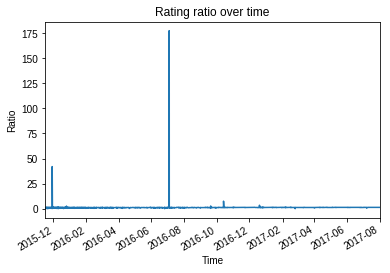

In [55]:
df_analyze['ratio_of_rating'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio.png')
plt.show()

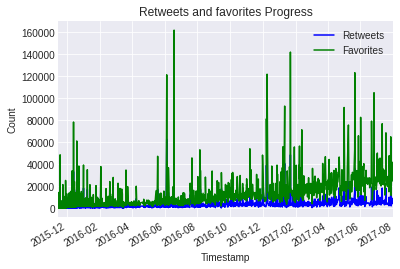

In [56]:
df_analyze['retweet_count'].plot(color = 'blue', label='Retweets')
df_analyze['favorite_count'].plot(color = 'green', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper right')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites Progress')
plt.savefig('Trends_retweets_favorites.png')
plt.show()

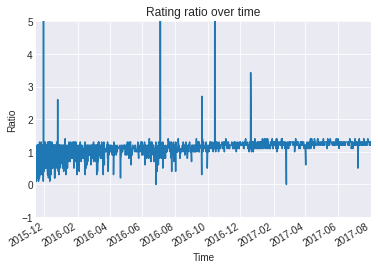

In [57]:
# Limit y axis to zoom in on data and ignore outliers
df_analyze['ratio_of_rating'].plot()
plt.ylim(-1, 5)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('zoom_ratio_rating.png')
plt.show()